In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#import data from csv files

data_set = pd.read_csv('hw04_data_set.csv')


training = data_set[:150]
testing = data_set[150:]

x_train = training['eruptions']
y_train = training['waiting']
x_test = testing['eruptions']
y_test = testing['waiting']

N = data_set.shape[0]

In [3]:
#Completing the g function and we enter values such as bin_width and origin.

bin_width = 0.37
origin = 1.5

min_value = origin
max_value = 5.7

left_borders = np.arange(min_value, max_value, bin_width)
right_borders = np.arange(min_value + bin_width, max_value + bin_width, bin_width)

g_hat = [np.sum((left_borders[i] < x_train) & (x_train <= right_borders[i])) * y_train[(left_borders[i] < x_train) & (x_train <= right_borders[i])].mean() / np.sum((left_borders[i] < x_train) & (x_train <= right_borders[i])) for i in range(len(left_borders))]

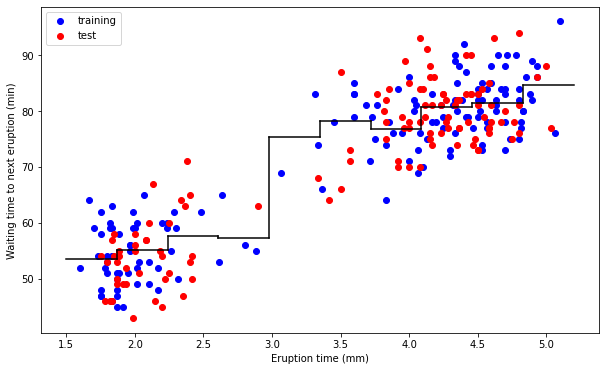

Regressogram => RMSE is 5.962617204275405 when h is 0.37


In [4]:
#Drawing training data points, test data points, and regressogram in the same plot and calculate root mean squared error


plt.figure(figsize=(10, 6))
plt.scatter(training['eruptions'], training['waiting'], c='b', label='training')
plt.scatter(testing['eruptions'], testing['waiting'], c='r', label='test')
plt.xlabel("Eruption time (mm)")
plt.ylabel("Waiting time to next eruption (min)")
plt.legend(loc='upper left')

for b in range(len(left_borders)):
    plt.plot([left_borders[b], right_borders[b]], [g_hat[b], g_hat[b]], "k-")
for b in range(len(left_borders) - 1):
    plt.plot([right_borders[b], right_borders[b]], [g_hat[b], g_hat[b + 1]], "k-")    

plt.show()

def RMSE(x_test, y_test, left_borders, right_borders):
    error = sum([((y_test[(left_borders[i] < x_test) & (x_test <= right_borders[i])] - g_hat[i])**2).sum()
                       for i in range(len(left_borders))])
    return np.sqrt(error / len(x_test))

rmse = RMSE(x_test, y_test, left_borders, right_borders)

print(f"Regressogram => RMSE is {rmse} when h is 0.37")

In [5]:
#Running mean smoother function defined


bin_width = 0.37
data_interval = np.linspace(min_value, max_value, 1601)

def Running_Mean_Smoother(a):
    if np.abs(a) <= 0.5:
        return 1
    else:
        return 0
    
g_hat = [(np.asarray([Running_Mean_Smoother(a) for a in (x - x_train) / bin_width]) * y_train).sum() / (np.asarray([Running_Mean_Smoother(a) for a in (x - x_train) / bin_width])).sum() for x in data_interval]


<ipython-input-5-17bed5a9029b>:13: RuntimeWarning: invalid value encountered in longlong_scalars
  g_hat = [(np.asarray([Running_Mean_Smoother(a) for a in (x - x_train) / bin_width]) * y_train).sum() / (np.asarray([Running_Mean_Smoother(a) for a in (x - x_train) / bin_width])).sum() for x in data_interval]


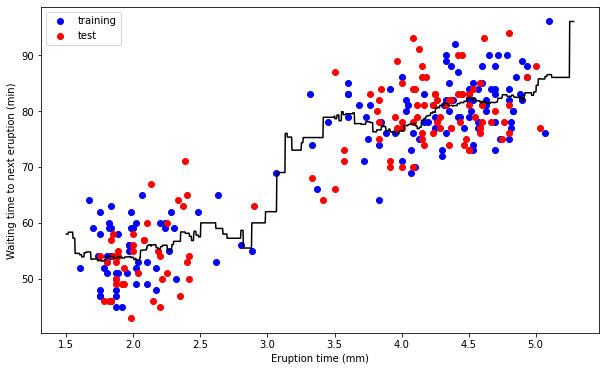

Running Mean Smoother => RMSE is 6.082292451579592 when h is 0.37


In [6]:
#Drawing training data points, test data points, and running mean smoother in the same plot and calculate root mean squared error

plt.figure(figsize=(10, 6))

plt.scatter(training['eruptions'], training['waiting'], c='b', label='training')
plt.scatter(testing['eruptions'], testing['waiting'], c='r', label='test')
plt.xlabel("Eruption time (mm)")
plt.ylabel("Waiting time to next eruption (min)")
plt.legend(loc='upper left')

plt.plot(data_interval, g_hat, "k-")

plt.show()

left_borders = data_interval[:-1]
right_borders = data_interval[1:]

rmse = RMSE(x_test, y_test, left_borders, right_borders)

print(f"Running Mean Smoother => RMSE is {rmse} when h is 0.37")

In [7]:
#Kernel Smoother function defined


bin_width = 0.37
data_interval = np.linspace(min_value, max_value, 1601)

def Kernel_Smoother(a):
    return 1/np.sqrt(2*np.pi) * np.exp(-(a**2)/2)

g_hat = [(np.asarray([Kernel_Smoother(a) for a in (x - x_train) / bin_width]) * y_train).sum() / (np.asarray([Kernel_Smoother(a) for a in (x - x_train) / bin_width])).sum() for x in data_interval]


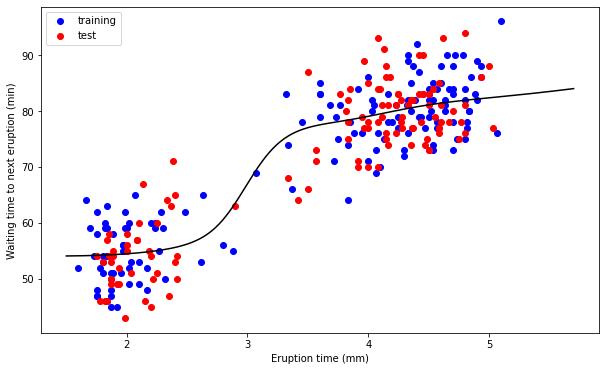

Kernel Smoother => RMSE is 5.8738236899494325 when h is 0.37


In [8]:
#Drawing training data points, test data points, and Kernel Smoother in the same plot and calculate root mean squared error


plt.figure(figsize=(10, 6))

plt.scatter(training['eruptions'], training['waiting'], c='b', label='training')
plt.scatter(testing['eruptions'], testing['waiting'], c='r', label='test')
plt.xlabel("Eruption time (mm)")
plt.ylabel("Waiting time to next eruption (min)")
plt.legend(loc='upper left')

plt.plot(data_interval, g_hat, "k-")

plt.show()

left_borders = data_interval[:-1]
right_borders = data_interval[1:]
rmse = RMSE(x_test, y_test, left_borders, right_borders)

print(f"Kernel Smoother => RMSE is {rmse} when h is 0.37")